<a href="https://colab.research.google.com/github/Renusree-P/datasciencecoursera/blob/main/BreastCancerPrediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Breast Cancer Detection

**Abstract:**
This data is related to Breast cancer in human. The classification goal is to predict Whether the cancer cell is positive or negative for Estrogen Receptor

**Data Set Information:**
The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples. Clinical and genomic data was downloaded from cBioPortal.
Cancers are associated with genetic abnormalities. Gene expression measures the level of gene activity in a tissue and gives information about its complex activities. Comparing the genes expressed in normal and diseased tissue can bring better insights into the cancer prognosis and outcomes. Using machine learning techniques on genetic data has the potentials of giving the correct estimation of survival time and can prevent unnecessary surgical and treatment procedures.


###  Attribute Information:

####  Breast Cancer data:
 - patient_id                                  
 - age_at_diagnosis : age of the patient when diagnosed with cancer (numeric)                         
 - type_of_breast_surgery : Breast Cancer surgery type (categorical: 'BREAST CONSERVING'  , 'MASTECTOMY')                 
 - Category : Breast Cancer types (categorical: 'Breast Cancer' , 'Breast Sarcoma')                                   
 - cancer_type_detailed : Detailed Breast cancer types (categorical: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma 4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer)                      
 - chemotherapy : (categorical: 0 means 'did not get chemotherapy done' and 1 means 'got chemotherapy done')                                              
 - HumanEpidermalGrowthFactorReceptor2_status : Whether the cancer is positive or negative for HER2 (categorical : 'Negative')
 - hormone_therapy : Whether or not the patient had hormonal as a treatment
  (categorical :  0 means 'did not get hormone_therapy done' and 1 means 'got harmone_therapy done')                           
 - inferred_menopausal_state : Whether the patient is is post menopausal or not (categorical : 'Post' , 'Pre')                
 - primary_tumor_laterality : Whether it is involving the right breast or the left breast (categorical : 'Left', ' Right')                  
 - lymph_nodes_examined_positive : (numeric)        
 - mutation_count : Number of gene that has relevant mutations (numeric)                             
 - overall_survival_months : Duration from the time of the intervention to death
 (numeric)                   
 - overall_survival : whether the patient is alive of dead (categorical : 0 means dead, 1 means alive)                       
 - radio_therapy : Whether or not the patient had radio as a treatment (categorical : 0 means 'did not get radio therapy done' and 1 means 'got radio therapy done')                     
 - tumor_size : Tumor size measured by imaging techniques (numeric)                               
 - tumor_stage : Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread (numeric)
 - Category: has the Breast cancer types (categorical: 'Breast Cancer', 'Breast Sarcoma')



####  Output variable (desired target): EstrogenReceptor_status :  Whether the cancer is positive or negative for Estrogen Receptor  (categorical : 'Negative' , 'Positive')   

     
###  Source:

 - Dataset from : https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/data



# Data Pre-processing

### Import the necessary libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read in the data set using the code:
```
#reading the dataset
import pandas as pd
import requests
from io import StringIO  

orig_url="-----" # copy and paste a Goodle drive share link to the data
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated
```

In [162]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO
import io

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

# load CSV file from Google Drive
Breastcancer_dataset = pd.read_csv("/content/drive/MyDrive/Data Science Project/BreastCancer_Dataset.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Examine the first few lines of the data set using the method

```data_frame.head()```

In [163]:
Breastcancer_dataset.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,Category,cancer_type_detailed,chemotherapy,EstrogenReceptor_status,HumanEpidermalGrowthFactorReceptor2_status,hormone_therapy,inferred_menopausal_state,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,0,Positive,Negative,1,Post,Right,10,NaN,140.500000,1,1,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,0,Positive,Negative,1,Pre,Right,0,2.0,84.633333,1,1,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,1,Positive,Negative,1,Pre,Right,1,2.0,163.700000,0,0,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,Positive,Negative,1,Pre,Right,3,1.0,164.933333,1,1,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,Positive,Negative,1,Post,Right,8,2.0,41.366667,0,1,40.0,2.0


### Examine the data information using the method
```data_frame.info()```

In [164]:
# take a look at the type, number of columns, entries, null values etc..
Breastcancer_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   patient_id                                  1904 non-null   int64  
 1   age_at_diagnosis                            1904 non-null   float64
 2   type_of_breast_surgery                      1882 non-null   object 
 3   Category                                    1904 non-null   object 
 4   cancer_type_detailed                        1889 non-null   object 
 5   chemotherapy                                1904 non-null   int64  
 6   EstrogenReceptor_status                     1904 non-null   object 
 7   HumanEpidermalGrowthFactorReceptor2_status  1904 non-null   object 
 8   hormone_therapy                             1904 non-null   int64  
 9   inferred_menopausal_state                   1904 non-null   object 
 10  primary_tumo

### Check for missing values using the method
```data_frame.isnull().any()```

In [165]:
Breastcancer_dataset.isnull().any() # one way to search for null values

patient_id                                    False
age_at_diagnosis                              False
type_of_breast_surgery                         True
Category                                      False
cancer_type_detailed                           True
chemotherapy                                  False
EstrogenReceptor_status                       False
HumanEpidermalGrowthFactorReceptor2_status    False
hormone_therapy                               False
inferred_menopausal_state                     False
primary_tumor_laterality                       True
lymph_nodes_examined_positive                 False
mutation_count                                 True
overall_survival_months                       False
overall_survival                              False
radio_therapy                                 False
tumor_size                                     True
tumor_stage                                    True
dtype: bool

No of missing values in dataset

type_of_breast_surgery=22, cancer_type_detailed=15, primary_tumor_laterality=105, mutation_count=44, tumor_size=20, tumor_stage=501

In [166]:
#check how many values are null in each column
Breastcancer_dataset.isnull().sum()

patient_id                                      0
age_at_diagnosis                                0
type_of_breast_surgery                         22
Category                                        0
cancer_type_detailed                           15
chemotherapy                                    0
EstrogenReceptor_status                         0
HumanEpidermalGrowthFactorReceptor2_status      0
hormone_therapy                                 0
inferred_menopausal_state                       0
primary_tumor_laterality                      106
lymph_nodes_examined_positive                   0
mutation_count                                 45
overall_survival_months                         0
overall_survival                                0
radio_therapy                                   0
tumor_size                                     20
tumor_stage                                   501
dtype: int64

In [167]:
#idenfity categorical or numerical
#Apply the median to the missing vaues of numerical variables and 'NA' to categorical variables

Breastcancer_dataset['type_of_breast_surgery']=Breastcancer_dataset['type_of_breast_surgery'].astype(object).fillna("NA")
Breastcancer_dataset['cancer_type_detailed']=Breastcancer_dataset['cancer_type_detailed'].astype(object).fillna("NA")
Breastcancer_dataset['primary_tumor_laterality']=Breastcancer_dataset['primary_tumor_laterality'].astype(object).fillna("NA")
Breastcancer_dataset['mutation_count'] = Breastcancer_dataset['mutation_count'].fillna(Breastcancer_dataset['mutation_count'].median())
Breastcancer_dataset['tumor_size'] = Breastcancer_dataset['tumor_size'].fillna(Breastcancer_dataset['tumor_size'].median())
Breastcancer_dataset['tumor_stage'] = Breastcancer_dataset['tumor_stage'].fillna(Breastcancer_dataset['tumor_stage'].median())


In [168]:
Breastcancer_dataset.isnull().sum()

patient_id                                    0
age_at_diagnosis                              0
type_of_breast_surgery                        0
Category                                      0
cancer_type_detailed                          0
chemotherapy                                  0
EstrogenReceptor_status                       0
HumanEpidermalGrowthFactorReceptor2_status    0
hormone_therapy                               0
inferred_menopausal_state                     0
primary_tumor_laterality                      0
lymph_nodes_examined_positive                 0
mutation_count                                0
overall_survival_months                       0
overall_survival                              0
radio_therapy                                 0
tumor_size                                    0
tumor_stage                                   0
dtype: int64

  Identify the unique values of each variable

In [169]:
Breastcancer_dataset['type_of_breast_surgery'].unique()


array(['MASTECTOMY', 'BREAST CONSERVING', 'NA'], dtype=object)

In [170]:
Breastcancer_dataset['cancer_type_detailed'].unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast', 'NA',
       'Metaplastic Breast Cancer'], dtype=object)

In [171]:
Breastcancer_dataset['primary_tumor_laterality'].unique()

array(['Right', 'Left', 'NA'], dtype=object)

### Separate the numerical and categorical variables
They will be treated differently in preprocessing and in visualization

In [172]:
df_numerical_features = Breastcancer_dataset.select_dtypes(include='number')
df_categorical_features = Breastcancer_dataset.select_dtypes(include='object')

In [173]:
df_numerical_features

,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,0,75.65,0,1,10,5.0,140.500000,1,1,22.0,2.0
1,2,43.19,0,1,0,2.0,84.633333,1,1,10.0,1.0
2,5,48.87,1,1,1,2.0,163.700000,0,0,15.0,2.0
3,6,47.68,1,1,3,1.0,164.933333,1,1,25.0,2.0
4,8,76.97,1,1,8,2.0,41.366667,0,1,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,0,1,1,4.0,196.866667,1,1,25.0,2.0
1900,7296,42.88,0,0,1,6.0,44.733333,0,1,20.0,2.0
1901,7297,62.90,0,1,45,4.0,175.966667,0,1,25.0,2.0
1902,7298,61.16,0,1,12,15.0,86.233333,0,0,25.0,2.0


In [174]:
df_categorical_features

,type_of_breast_surgery,Category,cancer_type_detailed,EstrogenReceptor_status,HumanEpidermalGrowthFactorReceptor2_status,inferred_menopausal_state,primary_tumor_laterality
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,Right
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Pre,Right
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Pre,Right
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,Pre,Right
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,Post,Right
...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,Positive,Negative,Pre,Right
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Positive,Pre,NA
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,Left
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,NA


In [175]:
# separate the numerical columns
# 'patient_id', 'age_at_diagnosis','chemotherapy','hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage'

num_cols=['patient_id', 'age_at_diagnosis','chemotherapy','hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage']

In [176]:
# separate the categorical columns
# 'type_of_breast_surgery', 'Category', 'cancer_type_detailed', 'EstrogenReceptor_status', 'HumanEpidermalGrowthFactorReceptor2_status', 'inferred_menopausal_state', 'primary_tumor_laterality'

cat_cols=['type_of_breast_surgery', 'Category', 'cancer_type_detailed','EstrogenReceptor_status', 'HumanEpidermalGrowthFactorReceptor2_status', 'inferred_menopausal_state', 'primary_tumor_laterality']

### Examine the first few rows of the numerical data

In [177]:
Breastcancer_dataset[num_cols]

,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,0,75.65,0,1,10,5.0,140.500000,1,1,22.0,2.0
1,2,43.19,0,1,0,2.0,84.633333,1,1,10.0,1.0
2,5,48.87,1,1,1,2.0,163.700000,0,0,15.0,2.0
3,6,47.68,1,1,3,1.0,164.933333,1,1,25.0,2.0
4,8,76.97,1,1,8,2.0,41.366667,0,1,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,0,1,1,4.0,196.866667,1,1,25.0,2.0
1900,7296,42.88,0,0,1,6.0,44.733333,0,1,20.0,2.0
1901,7297,62.90,0,1,45,4.0,175.966667,0,1,25.0,2.0
1902,7298,61.16,0,1,12,15.0,86.233333,0,0,25.0,2.0


### Examine the first few rows of the categorical data


In [178]:
Breastcancer_dataset[cat_cols]

,type_of_breast_surgery,Category,cancer_type_detailed,EstrogenReceptor_status,HumanEpidermalGrowthFactorReceptor2_status,inferred_menopausal_state,primary_tumor_laterality
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,Right
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Pre,Right
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Pre,Right
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,Pre,Right
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,Post,Right
...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,Positive,Negative,Pre,Right
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Positive,Pre,NA
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,Left
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,Post,NA


## Single Variable Analysis

### Visualizing Numerical Data

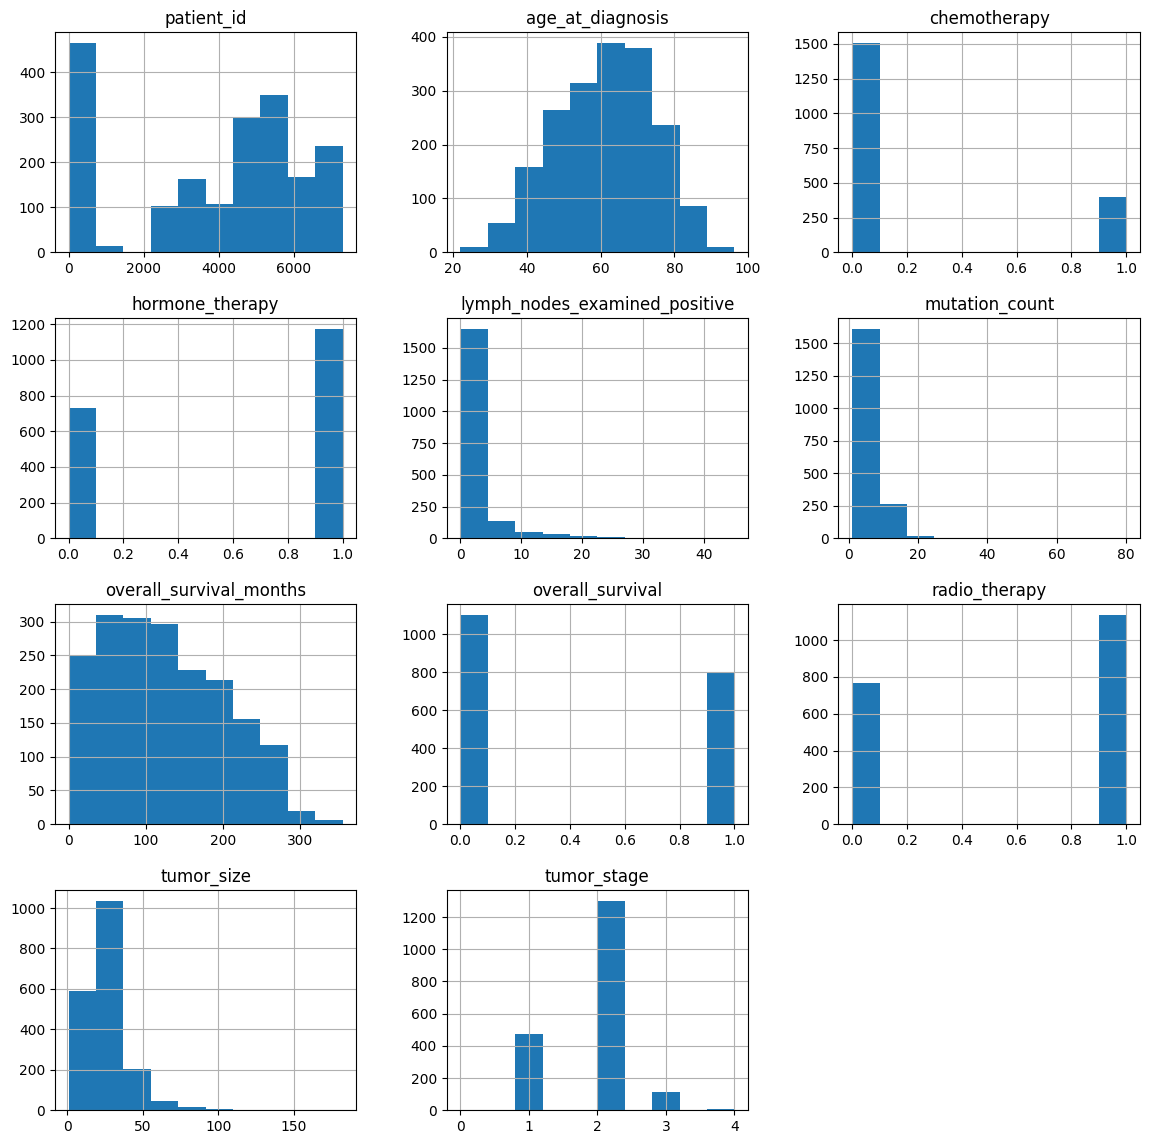

In [179]:
#creating histograms
Breastcancer_dataset[num_cols].hist(figsize=(14,14))
plt.show()

### Sumarizing Numerical Data

In [180]:
#Checking summary statistics
Breastcancer_dataset[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1904.0,3921.982143,2358.478332,0.00,896.500,4730.500000,5536.250000,7299.00
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
chemotherapy,1904.0,0.207983,0.405971,0.00,0.000,0.000000,0.000000,1.00
hormone_therapy,1904.0,0.616597,0.486343,0.00,0.000,1.000000,1.000000,1.00
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1904.0,5.681197,4.011903,1.00,3.000,5.000000,7.000000,80.00
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
overall_survival,1904.0,0.420693,0.493800,0.00,0.000,0.000000,1.000000,1.00
radio_therapy,1904.0,0.597164,0.490597,0.00,0.000,1.000000,1.000000,1.00
tumor_size,1904.0,26.204706,15.084713,1.00,17.000,23.000000,30.000000,182.00


### Sumarizing Categorical Data

In [181]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(Breastcancer_dataset[i].value_counts(normalize=True))
    print('*'*40)

type_of_breast_surgery
MASTECTOMY           0.591912
BREAST CONSERVING    0.396534
NA                   0.011555
Name: proportion, dtype: float64
****************************************
Category
Breast Cancer     0.999475
Breast Sarcoma    0.000525
Name: proportion, dtype: float64
****************************************
cancer_type_detailed
Breast Invasive Ductal Carcinoma             0.787815
Breast Mixed Ductal and Lobular Carcinoma    0.108718
Breast Invasive Lobular Carcinoma            0.074580
Breast Invasive Mixed Mucinous Carcinoma     0.011555
Breast                                       0.008929
NA                                           0.007878
Metaplastic Breast Cancer                    0.000525
Name: proportion, dtype: float64
****************************************
EstrogenReceptor_status
Positive    0.766282
Negative    0.233718
Name: proportion, dtype: float64
****************************************
HumanEpidermalGrowthFactorReceptor2_status
Negative    0.87605


## Bivariate Analysis

### Average value of numerical variables by class of target variable

In [182]:
#Mean of numerical variables grouped by Category
Breastcancer_dataset.groupby(['EstrogenReceptor_status'])[num_cols].mean()

,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
EstrogenReceptor_status,,,,,,,,,,,
Negative,4065.355056,54.568315,0.548315,0.285393,2.770787,5.997753,108.074382,0.438202,0.685393,28.417011,1.898876
Positive,3878.252913,63.075291,0.104181,0.717615,1.767649,5.584647,130.320699,0.415353,0.570254,25.529945,1.790953


### Looking at relative frequencies of categorical variables by class of target

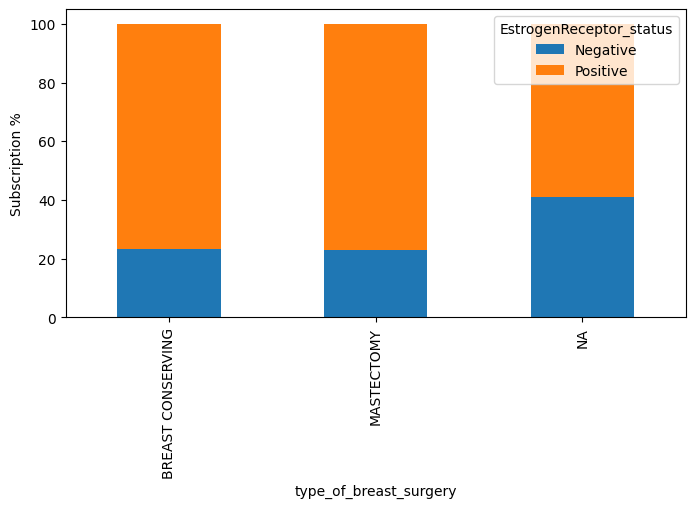

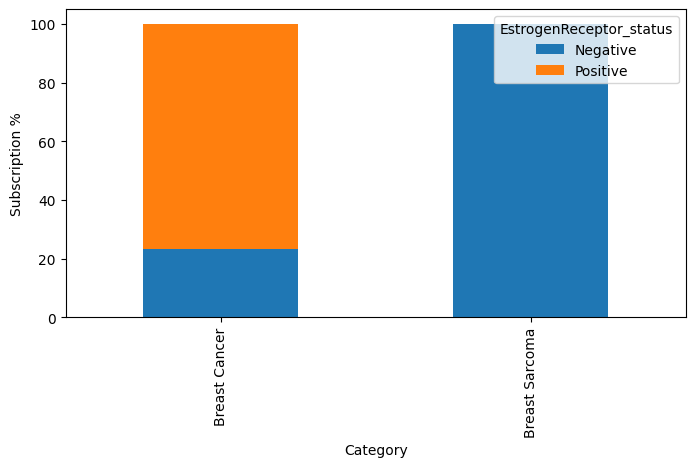

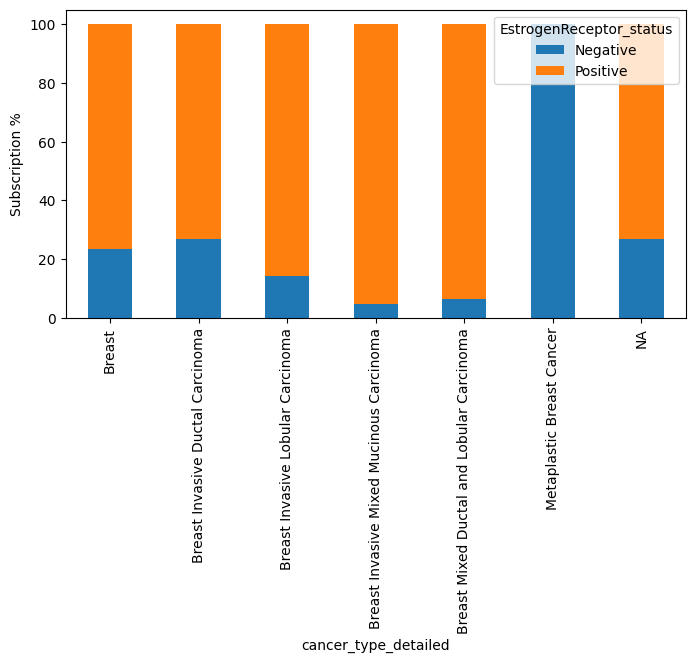

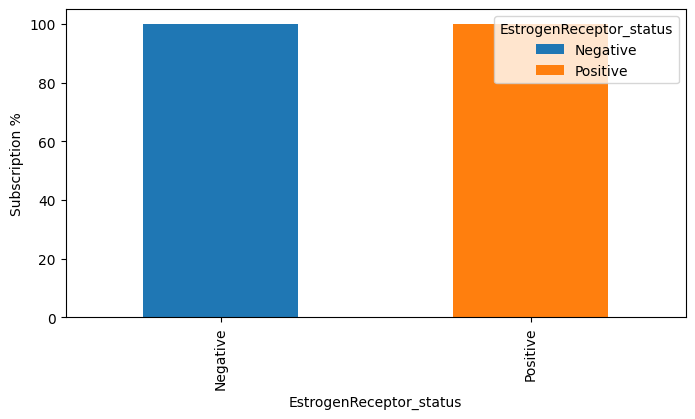

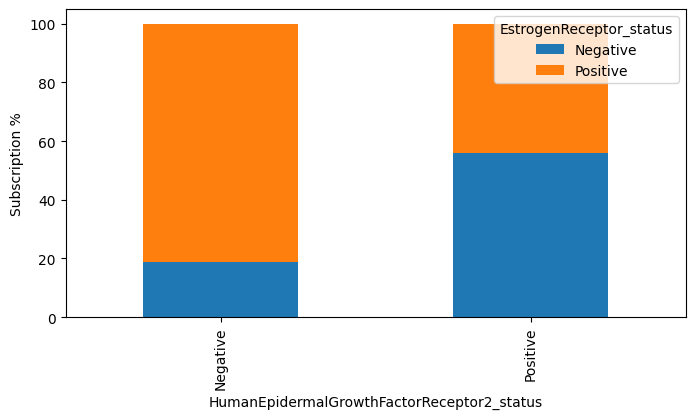

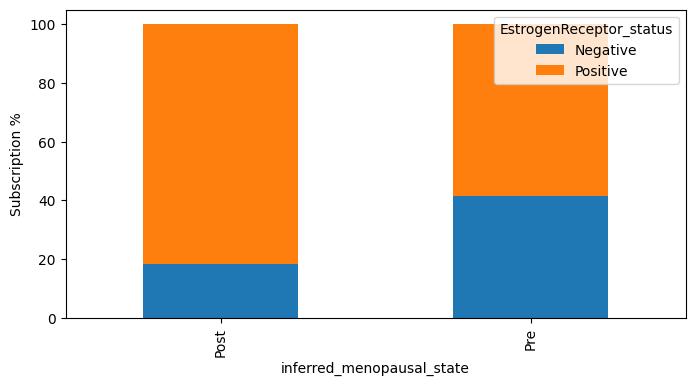

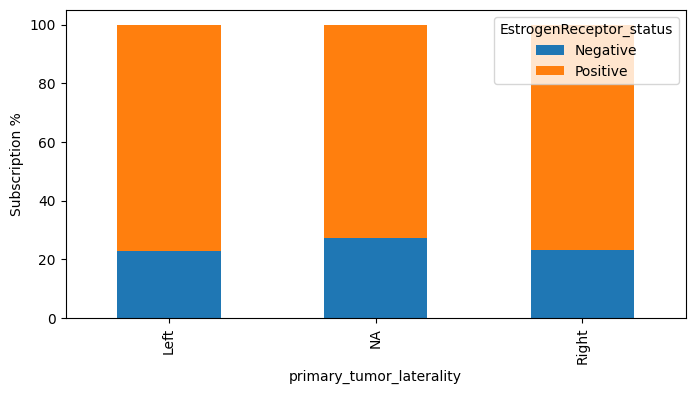

In [183]:
for i in cat_cols:
    if i!='Breast Cancer':
        (pd.crosstab(Breastcancer_dataset[i],Breastcancer_dataset['EstrogenReceptor_status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Subscription %')
       # Category	cancer_type_detailed	EstrogenReceptor_status	HumanEpidermalGrowthFactorReceptor2_status	inferred_menopausal_state	primary_tumor_laterality

### Creating dummy variables for the categorical variables.

Before doing so, check for the unique values in the column using the ```unique()``` method. The variables with only two values will be handled differently (note that this separation is not a requirement, merely conventional).

```data_frame['column'].unique()```

In [184]:
Breastcancer_dataset['type_of_breast_surgery'].unique()

array(['MASTECTOMY', 'BREAST CONSERVING', 'NA'], dtype=object)

In [185]:
#Breastcancer_dataset['Category'].unique()

In [186]:
Breastcancer_dataset['cancer_type_detailed'].unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast', 'NA',
       'Metaplastic Breast Cancer'], dtype=object)

In [187]:
Breastcancer_dataset['EstrogenReceptor_status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [188]:
Breastcancer_dataset['HumanEpidermalGrowthFactorReceptor2_status'].unique()

array(['Negative', 'Positive'], dtype=object)

In [189]:
Breastcancer_dataset['inferred_menopausal_state'].unique()

array(['Post', 'Pre'], dtype=object)

In [190]:
Breastcancer_dataset['primary_tumor_laterality'].unique()

array(['Right', 'Left', 'NA'], dtype=object)

### 8. Get dummies for ```'type_of_breast_surgery','Category', 'cancer_type_detailed', 'EstrogenReceptor_status', 'HumanEpidermalGrowthFactorReceptor2_status', 'inferred_menopausal_state', 'primary_tumor_laterality'```
Use the ```get_dummies()``` method for the variables with more than two categories. Reassign the bank data frame so that it has the newly transformed variables.
```
data_frame=pd.get_dummies(data=data_frame, columns=categorical_columns, drop_first=True)
```

In [191]:
#creating list of dummy columns
cat_cols_dummies=['type_of_breast_surgery','Category','cancer_type_detailed','EstrogenReceptor_status','HumanEpidermalGrowthFactorReceptor2_status', 'inferred_menopausal_state', 'primary_tumor_laterality']

#creating dummy variables and reassigning the data frame
Breastcancer_dataset = pd.get_dummies(data = Breastcancer_dataset, columns= cat_cols_dummies, drop_first= True)
Breastcancer_dataset.head(3)


,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,...,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_NA,EstrogenReceptor_status_Positive,HumanEpidermalGrowthFactorReceptor2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_NA,primary_tumor_laterality_Right
0,0,75.65,0,1,10,5.0,140.500000,1,1,22.0,...,False,False,False,False,False,True,False,False,False,True
1,2,43.19,0,1,0,2.0,84.633333,1,1,10.0,...,False,False,False,False,False,True,False,True,False,True
2,5,48.87,1,1,1,2.0,163.700000,0,0,15.0,...,False,False,False,False,False,True,False,True,False,True


### 9. Convert ```yes', 'no'``` to ```0, 1```
For categorical variables with 'yes' or 'no' values, convert the 'yes' to 1 and the 'no' values to 0.

In [192]:
#dict_EstrogenReceptor_status={'Negative': 1, 'Positive': 0}
#Breastcancer_dataset['EstrogenReceptor_status']=Breastcancer_dataset.EstrogenReceptor_status.map(dict_EstrogenReceptor_status)



### 10. Examine the first few lines of the bank data *set*

In [193]:
#Breastcancer_dataset['EstrogenReceptor_status'].unique()
Breastcancer_dataset.head(3)

,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,...,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_NA,EstrogenReceptor_status_Positive,HumanEpidermalGrowthFactorReceptor2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_NA,primary_tumor_laterality_Right
0,0,75.65,0,1,10,5.0,140.500000,1,1,22.0,...,False,False,False,False,False,True,False,False,False,True
1,2,43.19,0,1,0,2.0,84.633333,1,1,10.0,...,False,False,False,False,False,True,False,True,False,True
2,5,48.87,1,1,1,2.0,163.700000,0,0,15.0,...,False,False,False,False,False,True,False,True,False,True


In [194]:
Breastcancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   patient_id                                                      1904 non-null   int64  
 1   age_at_diagnosis                                                1904 non-null   float64
 2   chemotherapy                                                    1904 non-null   int64  
 3   hormone_therapy                                                 1904 non-null   int64  
 4   lymph_nodes_examined_positive                                   1904 non-null   int64  
 5   mutation_count                                                  1904 non-null   float64
 6   overall_survival_months                                         1904 non-null   float64
 7   overall_survival                                   

In [195]:
Breastcancer_dataset['EstrogenReceptor_status_Positive'].unique()

array([ True, False])

In [196]:
Breastcancer_dataset['cancer_type_detailed_NA'].unique()

array([False,  True])

### 11. Separate the feature variables from the target variable.

In [197]:
#Separating target variable and other variables
y= Breastcancer_dataset['EstrogenReceptor_status_Positive']
X= Breastcancer_dataset.drop(columns = ['EstrogenReceptor_status_Positive'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

### 12. Run the standard scalar to transform the values in the collection of feature values.
```
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here

X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
```

In [198]:
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [199]:
#Mean of numerical variables grouped by Category
Breastcancer_dataset_new1=Breastcancer_dataset
Breastcancer_dataset_new1.drop(columns= ["patient_id"])
Breastcancer_dataset_new1.groupby(['EstrogenReceptor_status_Positive'])[num_cols].mean()

,patient_id,age_at_diagnosis,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
EstrogenReceptor_status_Positive,,,,,,,,,,,
False,4065.355056,54.568315,0.548315,0.285393,2.770787,5.997753,108.074382,0.438202,0.685393,28.417011,1.898876
True,3878.252913,63.075291,0.104181,0.717615,1.767649,5.584647,130.320699,0.415353,0.570254,25.529945,1.790953


*This ends our preprocessing tasks for now * The next step would be splitting the training and testing sets and then running the model (s).

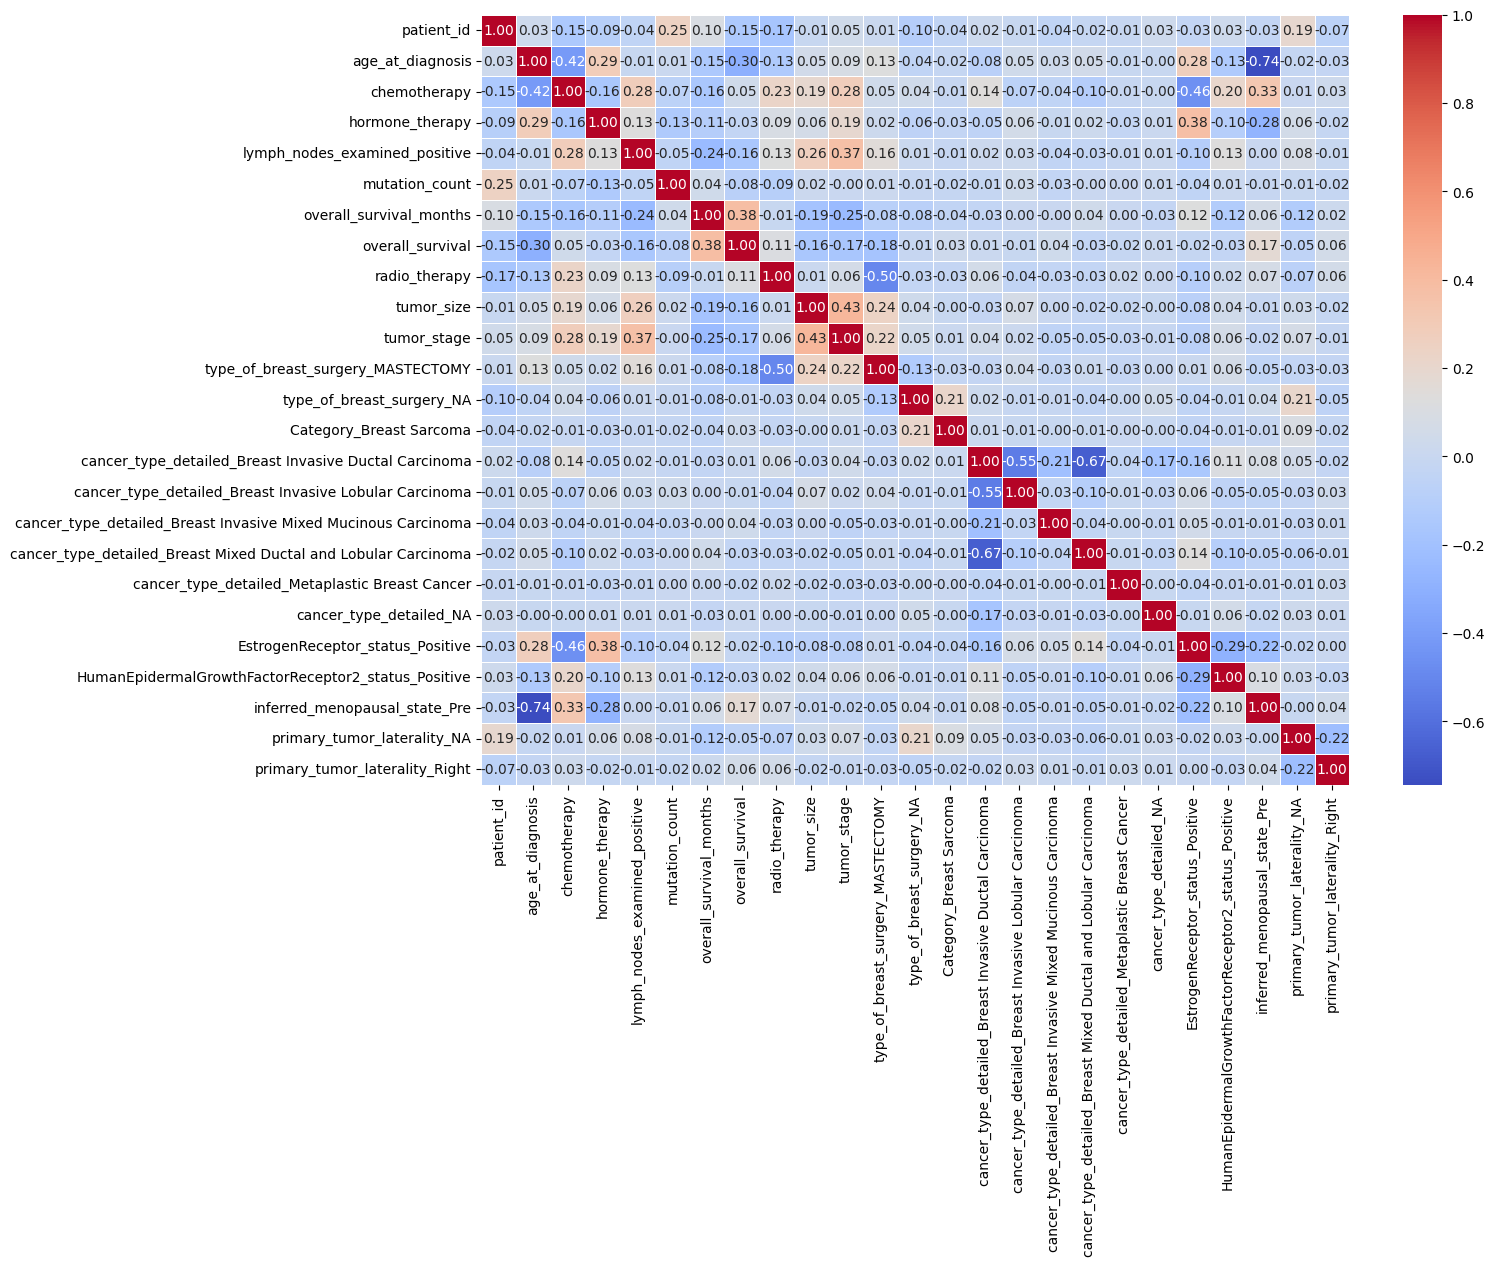

In [200]:
correlation_matrix = Breastcancer_dataset.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", xticklabels=True, yticklabels=True)

plt.xticks(rotation=90)

plt.show()


From the above correlation matrix, we can see that age_at_diagnosis and inferred_menopausal_state_Pre are highly correlated. So, we can remove inferred_menopausal_state_Pre from our dataset.

In [201]:
# Calculate correlation matrix
correlation_matrix = Breastcancer_dataset.corr(method='pearson')

# Print correlation matrix
print(correlation_matrix)

                                                    patient_id  \
patient_id                                            1.000000   
age_at_diagnosis                                      0.030515   
chemotherapy                                         -0.150650   
hormone_therapy                                      -0.091268   
lymph_nodes_examined_positive                        -0.043399   
mutation_count                                        0.246926   
overall_survival_months                               0.099731   
overall_survival                                     -0.148052   
radio_therapy                                        -0.174721   
tumor_size                                           -0.005344   
tumor_stage                                           0.045668   
type_of_breast_surgery_MASTECTOMY                     0.005682   
type_of_breast_surgery_NA                            -0.104663   
Category_Breast Sarcoma                              -0.035369   
cancer_typ

In [202]:
#Feature Engineering

In [203]:
Breastcancer_dataset.head(3)
Breastcancer_dataset.drop(['chemotherapy','hormone_therapy','radio_therapy'],axis=1)


,patient_id,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,tumor_size,tumor_stage,type_of_breast_surgery_MASTECTOMY,type_of_breast_surgery_NA,...,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_NA,EstrogenReceptor_status_Positive,HumanEpidermalGrowthFactorReceptor2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_NA,primary_tumor_laterality_Right
0,0,75.65,10,5.0,140.500000,1,22.0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,True
1,2,43.19,0,2.0,84.633333,1,10.0,1.0,False,False,...,False,False,False,False,False,True,False,True,False,True
2,5,48.87,1,2.0,163.700000,0,15.0,2.0,True,False,...,False,False,False,False,False,True,False,True,False,True
3,6,47.68,3,1.0,164.933333,1,25.0,2.0,True,False,...,False,False,True,False,False,True,False,True,False,True
4,8,76.97,8,2.0,41.366667,0,40.0,2.0,True,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,1,4.0,196.866667,1,25.0,2.0,False,False,...,True,False,False,False,False,True,False,True,False,True
1900,7296,42.88,1,6.0,44.733333,0,20.0,2.0,True,False,...,False,False,False,False,False,True,True,True,True,False
1901,7297,62.90,45,4.0,175.966667,0,25.0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,False
1902,7298,61.16,12,15.0,86.233333,0,25.0,2.0,True,False,...,False,False,False,False,False,True,False,False,True,False


In [204]:

Breastcancer_dataset.head(3)
Breastcancer_dataset.rename(columns = {'HumanEpidermalGrowthFactorReceptor2_status_Positive':'HEGFR_Status_Positive'})
Breastcancer_dataset['type_of_breast'] = Breastcancer_dataset['type_of_breast_surgery_MASTECTOMY'] + Breastcancer_dataset['type_of_breast_surgery_NA']
Breastcancer_dataset['primary_tumor'] = Breastcancer_dataset['primary_tumor_laterality_NA'] + Breastcancer_dataset['primary_tumor_laterality_Right']
Breastcancer_dataset['cancer_type'] = Breastcancer_dataset['cancer_type_detailed_Breast Invasive Lobular Carcinoma'] + Breastcancer_dataset['cancer_type_detailed_Breast Invasive Ductal Carcinoma'] + Breastcancer_dataset['cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma'] + Breastcancer_dataset['cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma'] + Breastcancer_dataset['cancer_type_detailed_Metaplastic Breast Cancer'] + Breastcancer_dataset['cancer_type_detailed_NA']

Breastcancer_dataset.drop(['chemotherapy','hormone_therapy','radio_therapy','cancer_type_detailed_Breast Invasive Lobular Carcinoma','cancer_type_detailed_Breast Invasive Ductal Carcinoma','type_of_breast_surgery_MASTECTOMY','type_of_breast_surgery_NA','primary_tumor_laterality_NA','primary_tumor_laterality_Right','cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma','cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma','cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma','cancer_type_detailed_Metaplastic Breast Cancer','cancer_type_detailed_NA'],axis=1, inplace = True)



In [231]:
Breastcancer_dataset.head(3)
Breastcancer_dataset.drop(['inferred_menopausal_state_Pre'],axis=1)

,patient_id,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,overall_survival_months,overall_survival,tumor_size,tumor_stage,Category_Breast Sarcoma,EstrogenReceptor_status_Positive,HumanEpidermalGrowthFactorReceptor2_status_Positive,type_of_breast,primary_tumor,cancer_type
0,0,75.65,10,5.0,140.500000,1,22.0,2.0,False,True,False,True,True,True
1,2,43.19,0,2.0,84.633333,1,10.0,1.0,False,True,False,False,True,True
2,5,48.87,1,2.0,163.700000,0,15.0,2.0,False,True,False,True,True,True
3,6,47.68,3,1.0,164.933333,1,25.0,2.0,False,True,False,True,True,True
4,8,76.97,8,2.0,41.366667,0,40.0,2.0,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,1,4.0,196.866667,1,25.0,2.0,False,True,False,False,True,True
1900,7296,42.88,1,6.0,44.733333,0,20.0,2.0,False,True,True,True,True,True
1901,7297,62.90,45,4.0,175.966667,0,25.0,2.0,False,True,False,True,False,True
1902,7298,61.16,12,15.0,86.233333,0,25.0,2.0,False,True,False,True,True,True


# Plotting Graphs

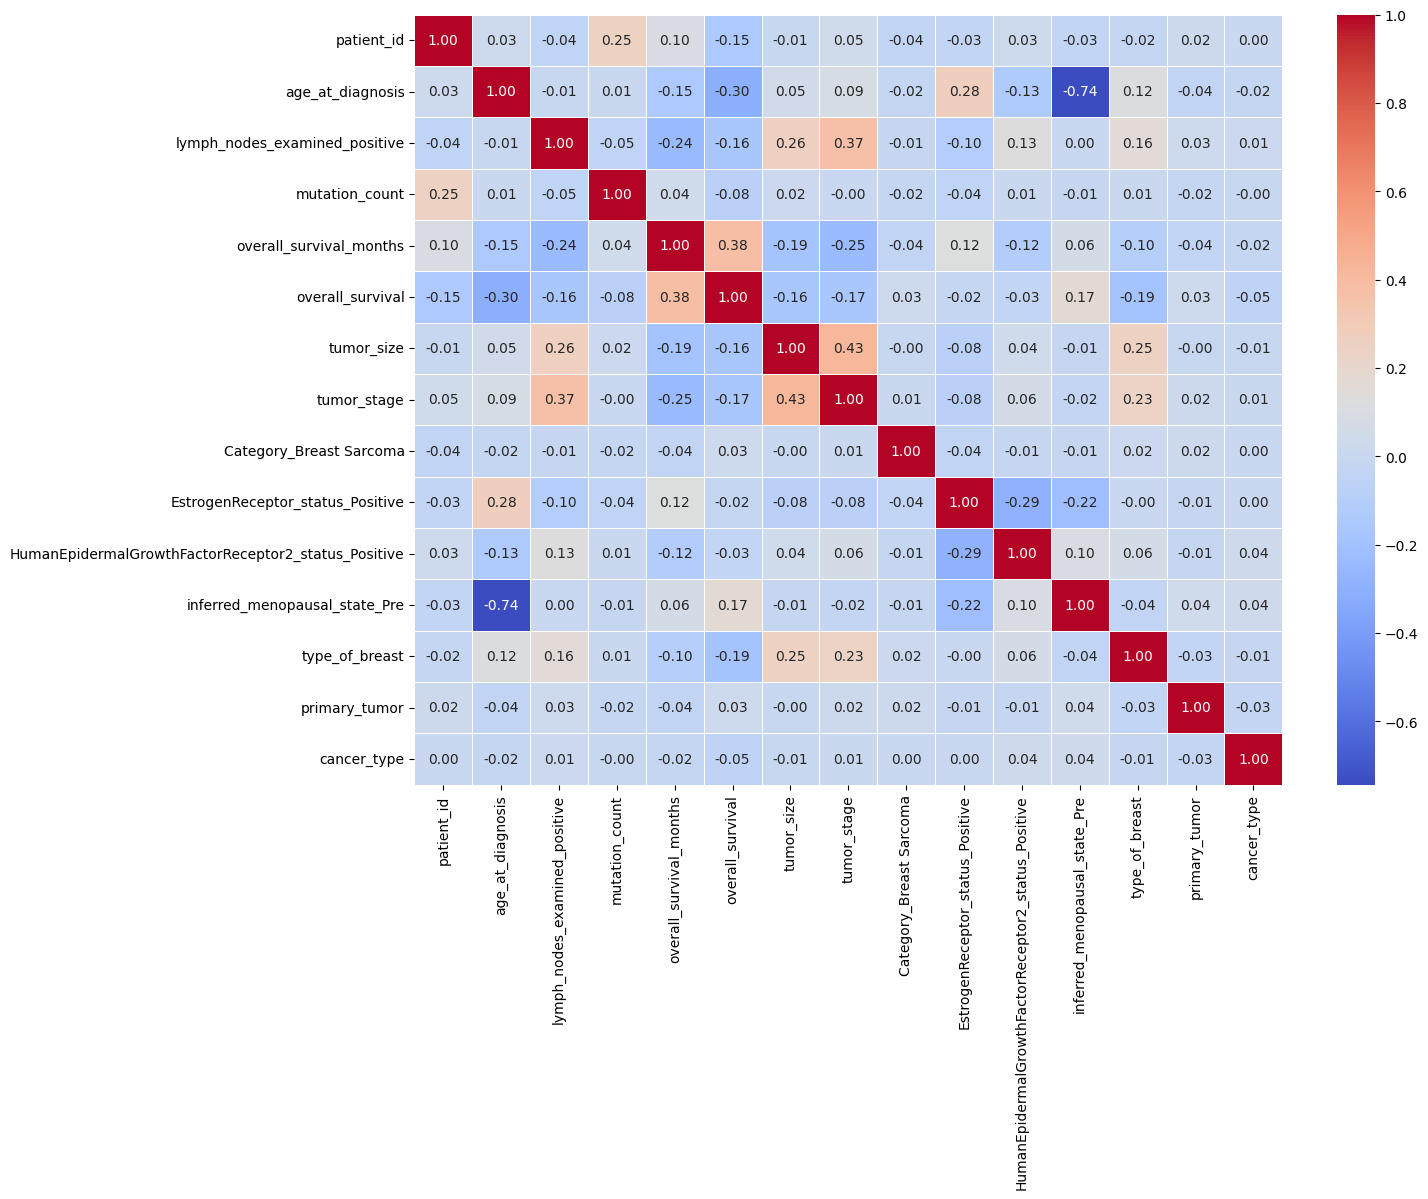

In [206]:
correlation_matrix = Breastcancer_dataset.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", xticklabels=True, yticklabels=True)

plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Graph of tumor size vs EstrogenReceptor_status_Positive of tumor')

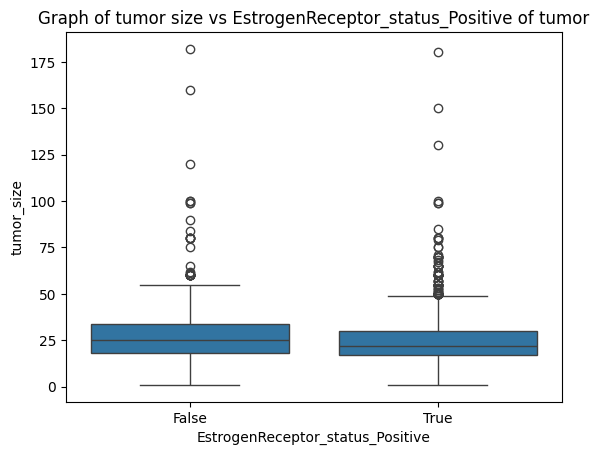

In [207]:
#Plot Graphs
plot = sns.boxplot(x='EstrogenReceptor_status_Positive', y='tumor_size', data=Breastcancer_dataset)
plot.set_title("Graph of tumor size vs EstrogenReceptor_status_Positive of tumor")

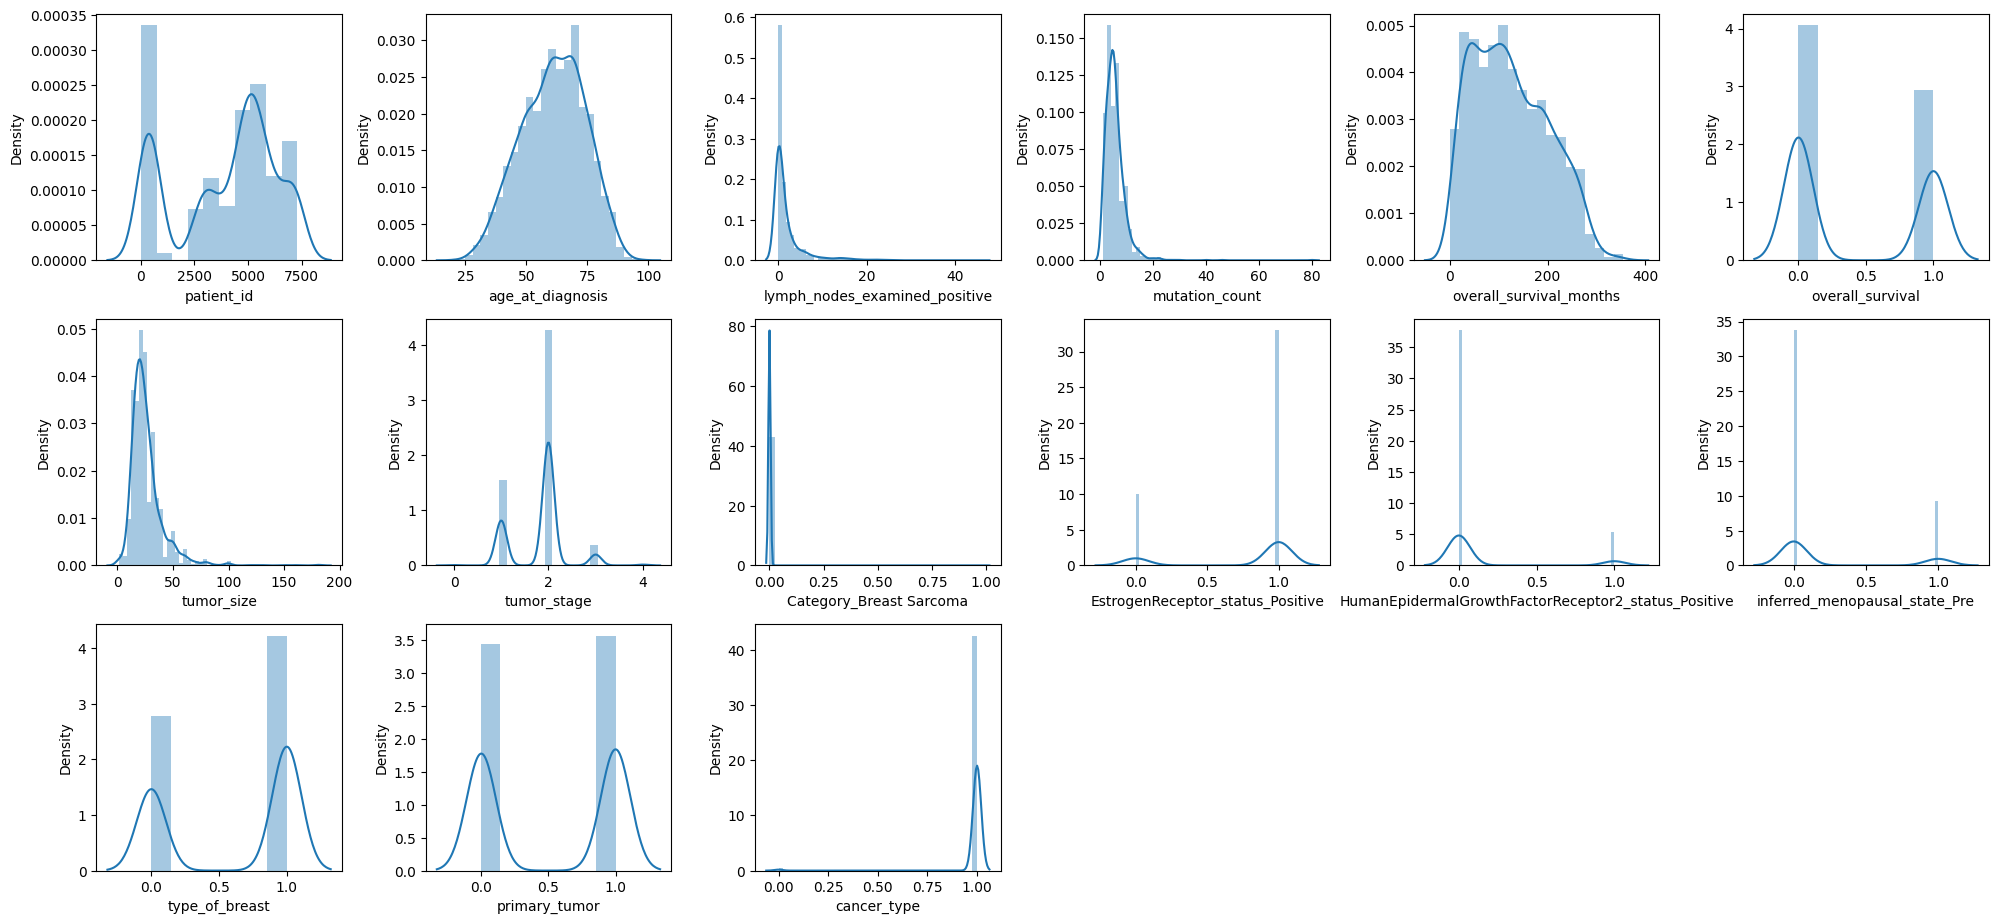

In [232]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in Breastcancer_dataset:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(Breastcancer_dataset[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

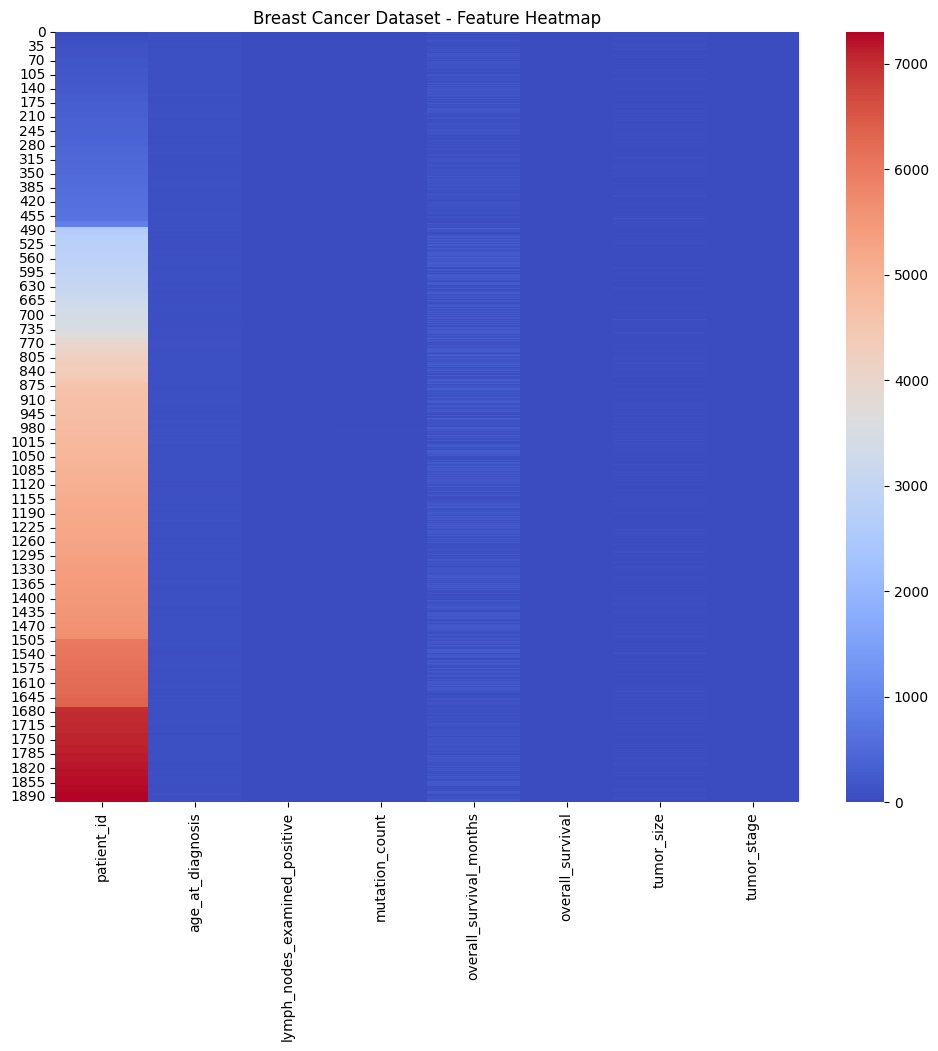

In [233]:
# Heatmap
#plt.figure(figsize=(12, 10))
#sns.heatmap(Breastcancer_dataset, cmap='coolwarm')
#plt.title("Breast Cancer Dataset - Feature Heatmap")
#plt.show()

# Select only numeric columns
numeric_data = Breastcancer_dataset.select_dtypes(include='number')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data, cmap='coolwarm')
plt.title("Breast Cancer Dataset - Feature Heatmap")
plt.show()

# Splitting the Data and Model Training

In [234]:
#Split Data into Training and Testing sets
from sklearn.model_selection import train_test_split
X = Breastcancer_dataset.drop('EstrogenReceptor_status_Positive', axis=1)
y = Breastcancer_dataset['EstrogenReceptor_status_Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


DECISION TREE

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = Breastcancer_dataset.drop('EstrogenReceptor_status_Positive', axis=1)
y = Breastcancer_dataset['EstrogenReceptor_status_Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7296587926509186
Classification Report:
              precision    recall  f1-score   support

       False       0.43      0.44      0.44        90
        True       0.83      0.82      0.82       291

    accuracy                           0.73       381
   macro avg       0.63      0.63      0.63       381
weighted avg       0.73      0.73      0.73       381



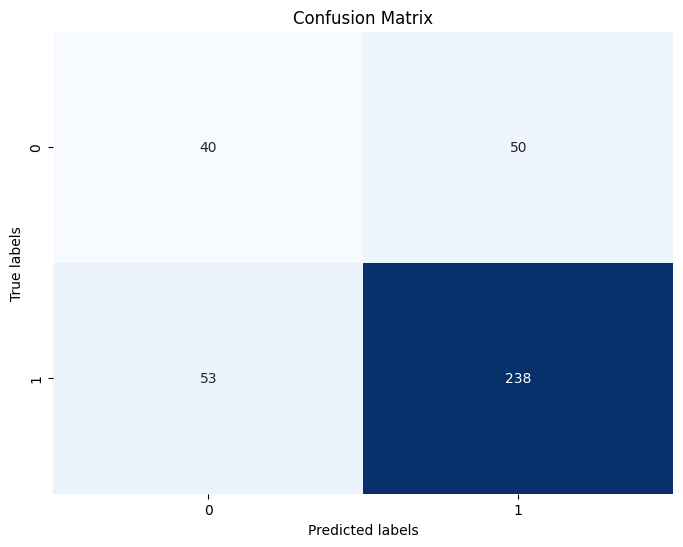

Specificity: 0.4444444444444444
Sensitivity: 0.8178694158075601


In [236]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate specificity and sensitivity
tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


In [237]:
#creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [238]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

In [239]:
#fitting decision tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [240]:
y_pred = dt.predict(X_test)
y_pred[:6]

array([ True,  True,  True,  True,  True,  True])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       355
        True       1.00      1.00      1.00      1168

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



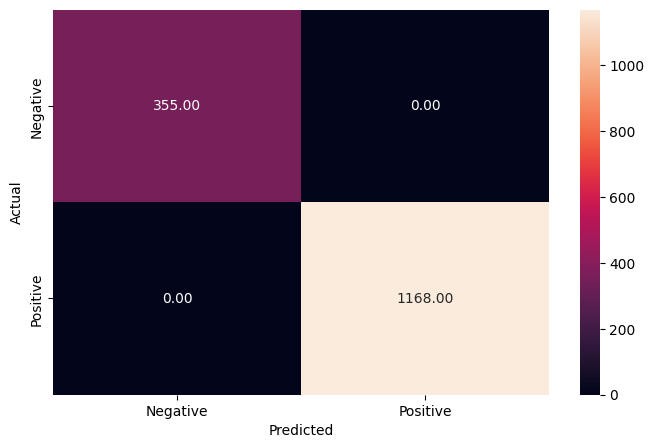

In [241]:
#checking performance on train dataset
y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

       False       0.45      0.50      0.47        90
        True       0.84      0.81      0.82       291

    accuracy                           0.73       381
   macro avg       0.64      0.65      0.65       381
weighted avg       0.75      0.73      0.74       381



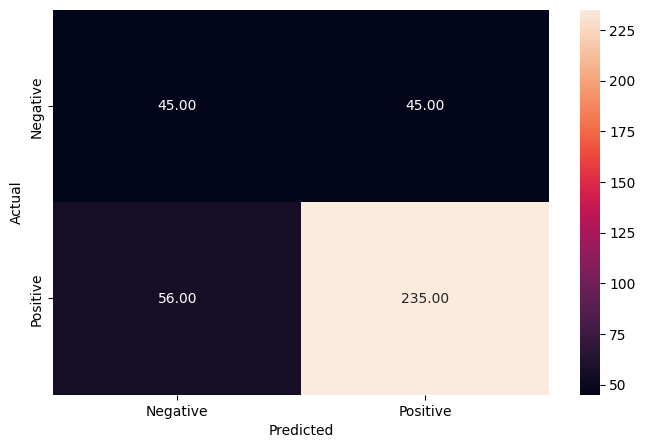

In [242]:
#checking model performace of dt
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

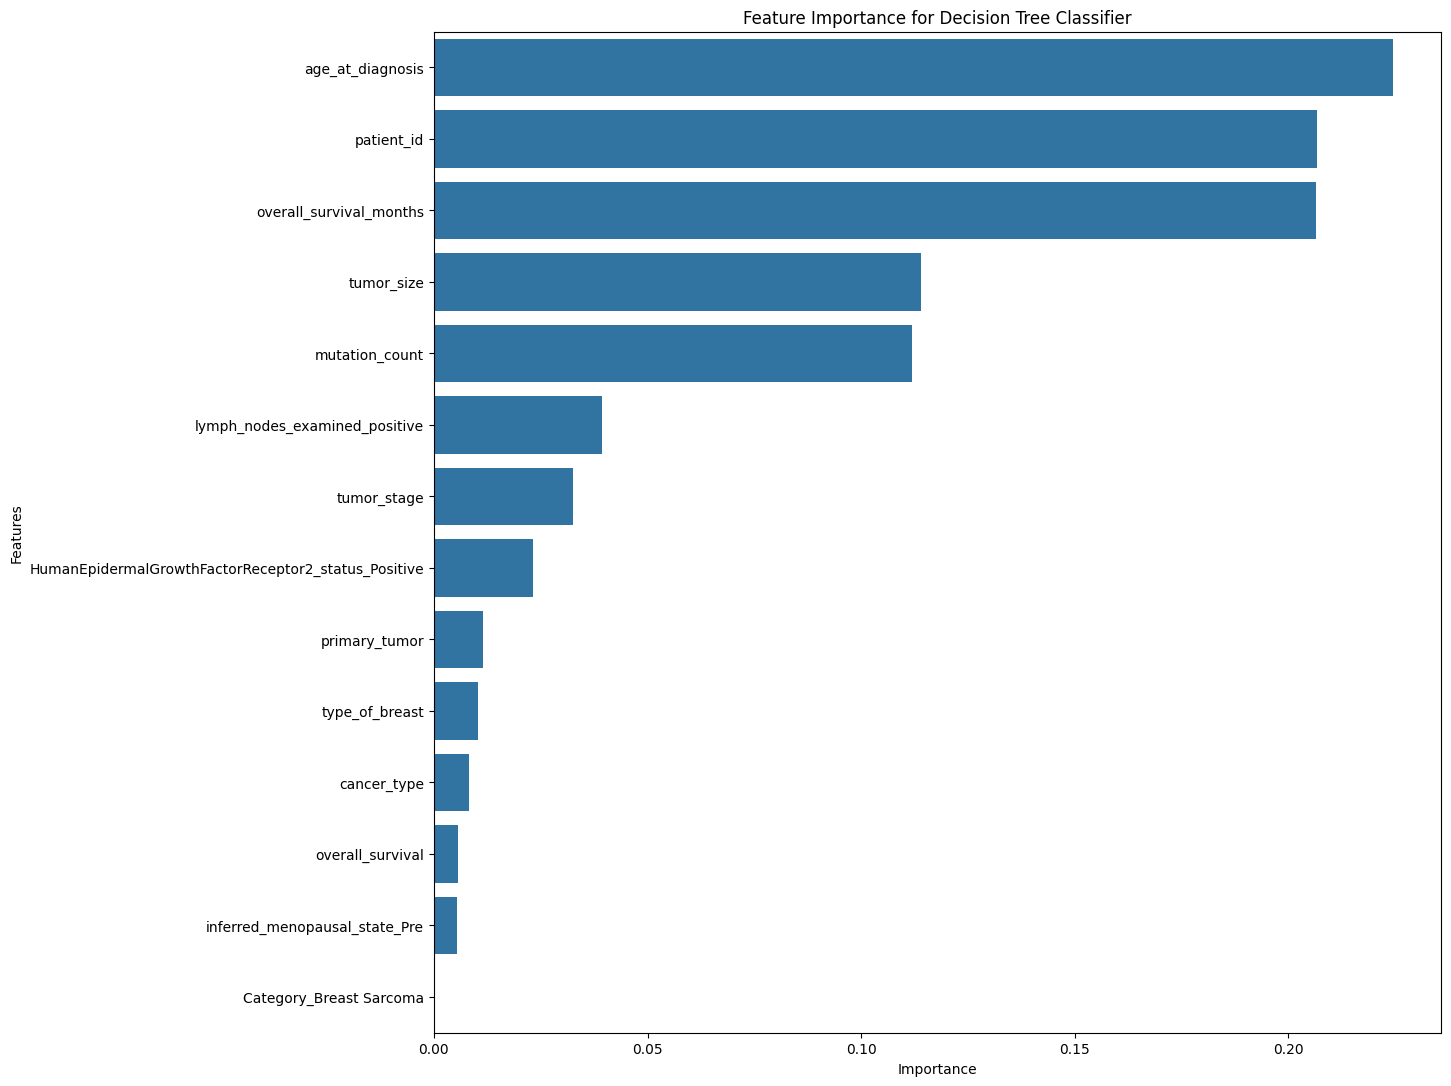

In [243]:
#plotting the importance plot
feature_importances = dt.feature_importances_
columns = X.columns
feature_importances_df = pd.DataFrame(feature_importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(13, 13))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index)
plt.title("Feature Importance for Decision Tree Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**Note:** In the context of binary classification, such as in medical diagnostics where a test predicts the presence or absence of a condition (e.g., disease), specificity and sensitivity are two important metrics used to evaluate the performance of the predictive model.

- Specificity, indicating the model's capacity to correctly identify true negative cases from all actual negatives, shows its ability to identify negatives accurately. **With a specificity of 0.5, the model accurately identifies 50% of the actual negative cases**, reflecting its performance in distinguishing true negatives. This metric is crucial for understanding the model's proficiency in avoiding false positives.

- Sensitivity, also known as recall, quantifies the model's ability to correctly identify actual positive cases among all positive cases. **With a sensitivity of 0.841, the model accurately identifies 84.1% of the actual positive cases, providing insight into its effectiveness in recognizing true positives.**

- A **sensitivity of 0.841 is relatively high**, indicating that the model is effective at identifying positive cases. However, the specificity of 0.5 suggests that the model's ability to correctly identify negative cases is not as strong.

- Therefore, while a **sensitivity of 0.841 is promising**, further **improvement in specificity would be desirable** to achieve a more balanced and reliable prediction.


**Note:** Since, our model is not a very good one (due to not high specificity) we will try to improve the specificity of the model in next steps by trying the following methods:

- **Resampling Techniques:** If the dataset is imbalanced, where one class (e.g., negative cases) significantly outnumbers the other (e.g., positive cases), applying resampling techniques such as oversampling the minority class or undersampling the majority class can help balance the dataset and improve the model's performance on both classes.

- **Cross-Validation and Hyperparameter Tuning:** Use techniques like cross-validation and hyperparameter tuning to optimize the model's performance on a validation set. This can help identify the best set of parameters and reduce overfitting, ultimately improving specificity.

By applying these strategies, we can work towards improving the specificity of your model while maintaining its overall predictive performance.

**Random Forest**

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = Breastcancer_dataset.drop('EstrogenReceptor_status_Positive', axis=1)
y = Breastcancer_dataset['EstrogenReceptor_status_Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7867132867132867
Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.35      0.45       143
        True       0.81      0.93      0.87       429

    accuracy                           0.79       572
   macro avg       0.72      0.64      0.66       572
weighted avg       0.77      0.79      0.76       572



              precision    recall  f1-score   support

       False       1.00      1.00      1.00       302
        True       1.00      1.00      1.00      1030

    accuracy                           1.00      1332
   macro avg       1.00      1.00      1.00      1332
weighted avg       1.00      1.00      1.00      1332



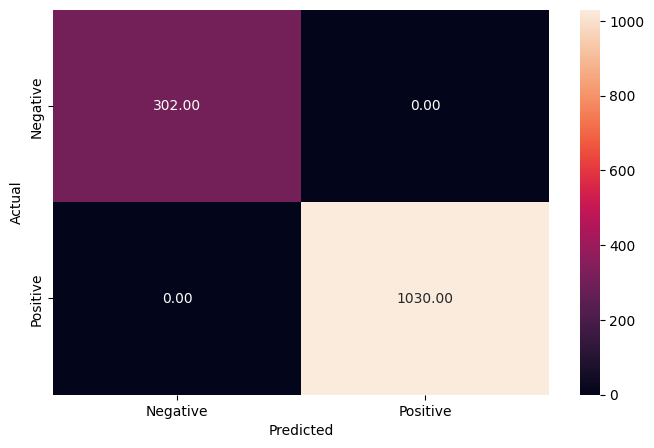

In [245]:
#checking performance on train dataset
y_train_pred_clf=clf.predict(X_train)
metrics_score(y_train,y_train_pred_clf)

              precision    recall  f1-score   support

       False       0.64      0.69      0.66       143
        True       0.89      0.87      0.88       429

    accuracy                           0.82       572
   macro avg       0.76      0.78      0.77       572
weighted avg       0.83      0.82      0.83       572



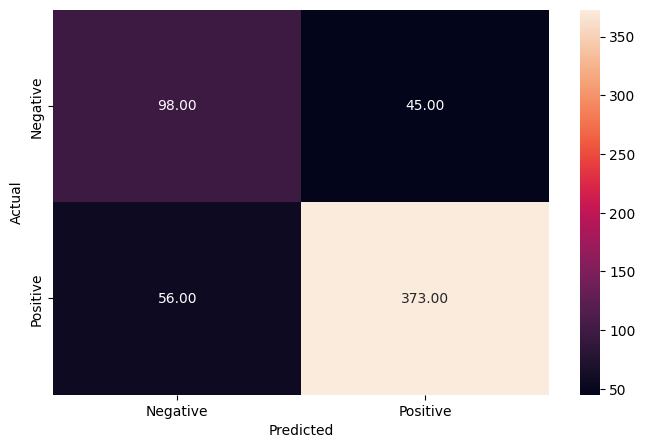

In [246]:
#checking model test performace of dt
y_pred_test_clf = dt.predict(X_test)
metrics_score(y_test, y_pred_test_clf)

**Note:** We can see that the accuracy of the **Decision Tree Model is 0.73**, where as the accuracy of the **Random Forest Model is 0.82**. So, we can say that the Random Forest model shows some improvement in accuracy.

# Image Classification Model

*NOTE* we are facing issue with image reading , as of now we are still working on this

In [223]:
!pip install tensorflow

In [224]:
!pip install keras

In [225]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
#import Hspy

In [226]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

path_No = '/content/drive/MyDrive/Data Science Project/Image Classifications/NO/*.png'
path_Yes = '/content/drive/MyDrive/Data Science Project/Image Classifications/YES/*.png'

cancer = []
no_cancer = []
random_state = 42

for file in glob.iglob(path_Yes):
    print(file)
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128))
    cancer.append((img, 1))  # Appending tuple with image and label 1 (indicating presence of Cancer)

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128))
    cancer.append((img, 1))

    print

for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_cancer.append((img, 0))  # Appending tuple with image and label 0 (indicating absence of Cancer)

# Concatenating the two lists and shuffle the data
all_data = cancer + no_cancer


# Splitting data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
df=pd.DataFrame(cancer)
df.head()

""


In [228]:
labels

array([], dtype=float64)

In [229]:
df1=pd.DataFrame(no_cancer)
df1.head()

""


In [247]:
import os
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

# Path to the folder containing your images
folder_path = '/content/drive/MyDrive/Data Science Project/Image Classifications/YES/'

# List all files in the folder
file_list = os.listdir(folder_path)
# Loop through each file in the folder
for file_name in file_list:
    # Check if the file is a PNG file
    if file_name.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, file_name)

        # Read the image using PIL
        image = Image.open(image_path)
        #print(image)
        plt.figure(figsize=(3,3))
        plt.imshow(image)
        # Display the image (optional)
        #image.show()  # You can also display using plt.imshow() if using matplotlib

        # Process the image as needed
        # For example, you can perform image analysis, feature extraction, etc.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data Science Project/Image Classifications/YES/'

In [ ]:
#Import libraries
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Normal
# 1 - Cancer

data = []
result = []

path_No = '/content/drive/MyDrive/Data Science Project/Image Classifications/NO/*.png'
path_Yes = '/content/drive/MyDrive/Data Science Project/Image Classifications/YES/*.png'


for file in glob.iglob(path_No):
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128))
    img = np.array(img)
    if img.shape == (128,128,3):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# Iterate through normal images
for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128))
    img = np.array(img)
    if img.shape == (128,128,3):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

# Convert data and result to numpy arrays
data = np.array(data)
result = np.array(result)

# Reshape result array
result = result.reshape(-1, 2)  # Assuming you have 2 classes

# Plotting
# Count the number of Tumor and Normal samples
Cancer_count = np.sum(result[:, 0] == 1)
normal_count = np.sum(result[:, 1] == 1)

# Create labels and counts for the bar plot
labels = ['Cancer', 'Normal']
counts = [Cancer_count, normal_count]

# Example colors that are complementary and visually pleasing
colors = ['skyblue', 'lightcoral']

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Distribution of Cancer and Normal Samples')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
!apt-get install tree
#clear_output()
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

In [ ]:
import shutil
import itertools
import imutils
import os

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

IMG_PATH = '../content/drive/MyDrive/Data Science Project/Image Classifications/'
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 5:
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

In [ ]:
from tqdm import tqdm
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Cancer: {}'.format(labels_dict[index]))
        plt.show()
plot_samples(X_train, y_train, labels, 30)

In [ ]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [ ]:
img = cv2.imread('../content/drive/MyDrive/Data Science Project/Image Classifications/YES/10255_idx5_x1001_y501_class1.png')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

In [ ]:
plot_samples(X_train_crop, y_train, labels, 30)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [ ]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

In [ ]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
os.mkdir('preview')
x = X_train_crop[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

In [ ]:
import cv2
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
  img = cv2.imread('preview/' + img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(3,7,i)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  i += 1
  if i > 3*7:
    break
  plt.suptitle('Augemented Images')
  plt.show()

In [ ]:
!rm -rf preview/

In [ ]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

In [ ]:
# load base model
vgg16_weight_path = '../content/drive/MyDrive/Data Science Project/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

In [ ]:
NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

In [ ]:
EPOCHS = 1

history = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    validation_data=validation_generator,
    validation_steps=None,
    #callbacks=[es]
)

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
# validate on val set
predictions = model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [ ]:
# validate on test set
predictions = model.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [ ]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {y_val[i]}\nPredicted class: {predictions[i]}')
        plt.show()